In [1]:
pip install imbalanced-learn


  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np


In [2]:
df1 = pd.read_csv('sample_submission.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('train.csv')

In [10]:
df3.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [9]:
df3.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [11]:
duplicates = df3['id'].duplicated()
count_true_false = duplicates.value_counts()
print(count_true_false)

id
False    58645
Name: count, dtype: int64


In [5]:
df3.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [5]:
df2.shape

(39098, 12)

In [7]:
df3['loan_status'].unique()


array([0, 1], dtype=int64)

C:\Users\USER\AppData\Local\Temp\ipykernel_10184\2444491119.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_values.index, y=count_values.values, palette='viridis')


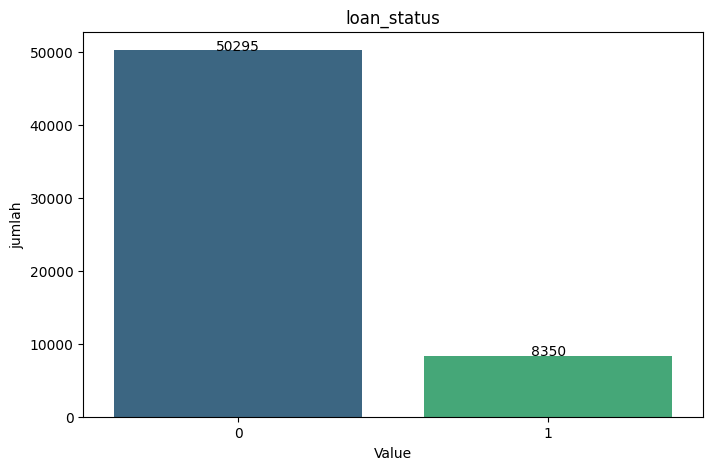

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
count_values = df3['loan_status'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=count_values.index, y=count_values.values, palette='viridis')
plt.title('loan_status')
plt.xlabel('Value')
plt.ylabel('jumlah')
for i, v in enumerate(count_values.values):
    plt.text(i, v + 0.1, str(v), ha='center')

plt.show()

In [10]:
from sklearn.utils import resample
import pandas as pd

# Misalnya, data Anda ada dalam DataFrame 'df' dengan 'loan_status' sebagai label
# Pisahkan kelas mayoritas (0) dan minoritas (1)
df_majority = df3[df3['loan_status'] == 0]
df_minority = df3[df3['loan_status'] == 1]

# Lakukan undersampling pada kelas mayoritas
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # Jangan duplicate (no replacement)
                                    n_samples=len(df_minority),   # Samakan jumlahnya dengan kelas minoritas
                                    random_state=42)  # Untuk reproducibility

# Gabungkan kembali kelas minoritas dan mayoritas yang telah di-undersample
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Shuffle agar data acak
df3 = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Periksa distribusi label setelah undersampling
print(df3['loan_status'].value_counts())


loan_status
0    8350
1    8350
Name: count, dtype: int64


In [11]:
df3.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,5012,22,38000,RENT,0.0,PERSONAL,B,10000,10.99,0.26,N,2,0
1,57297,29,100000,MORTGAGE,6.0,VENTURE,B,12000,9.25,0.12,N,9,0
2,13933,23,90000,RENT,4.0,PERSONAL,C,10000,14.22,0.11,Y,3,0
3,58504,23,54000,MORTGAGE,7.0,HOMEIMPROVEMENT,C,2000,13.35,0.04,N,2,1
4,35358,22,35000,MORTGAGE,6.0,MEDICAL,A,3500,6.99,0.10,N,4,0


In [12]:
df3.to_csv('train_undersampling.csv')

In [13]:
df2.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [14]:
null_counts = df2.isnull().sum()
print(null_counts)

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [13]:
null_counts = df3.isna().sum()
print(null_counts)

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
